## Customer Segmentation and Visualization in a Shopping Mall Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.shape

(200, 5)

In [7]:
df.describe() # Generate descriptive statistics of the numerical columns in the DataFrame 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.dtypes  # Get data types of columns in the DataFrame

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
# Check for missing values in the DataFrame and sum the missing values in each column
df.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visulization

In [10]:
import seaborn as sns

### Create a pair plot to visualize pairwise relationships between 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'

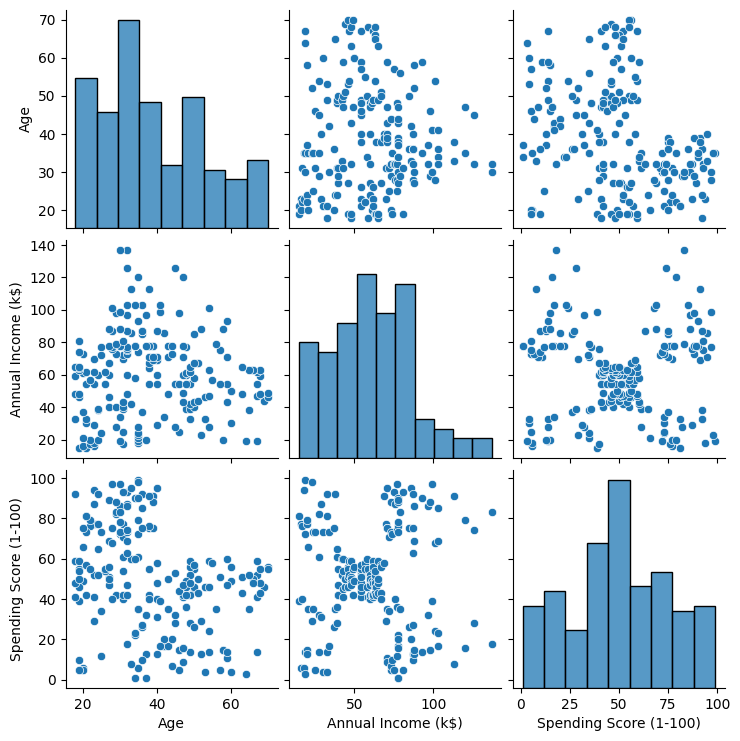

In [11]:
# Pairwise scatterplots
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

### Create two box plots side by side to visualize the distribution of 'Annual Income (k$)' and 'Spending Score (1-100)'

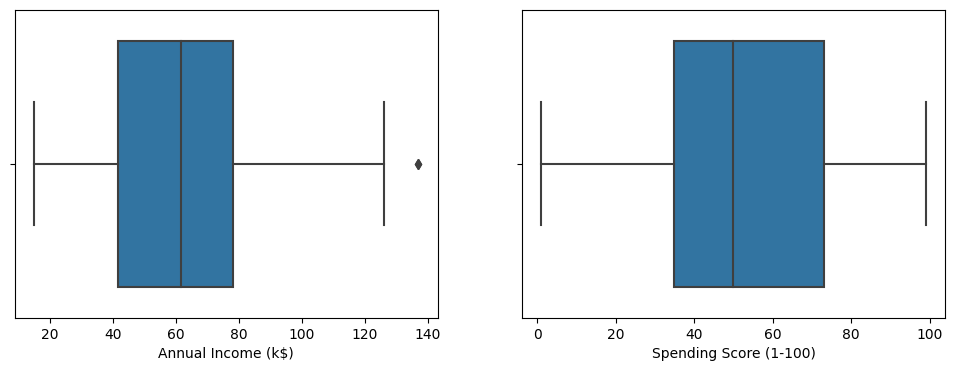

In [12]:
# Box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='Annual Income (k$)', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='Spending Score (1-100)', data=df)
plt.show()

### Calculate the correlation matrix for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'

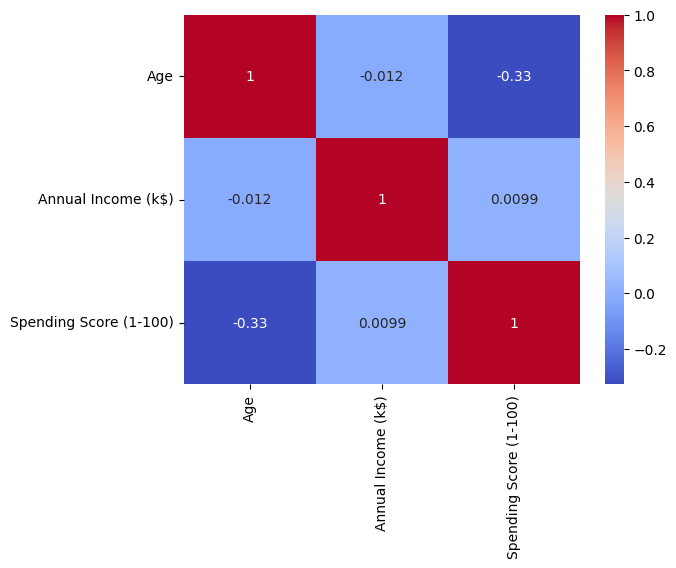

In [13]:
# Correlation matrix
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Start Building The Model

In [14]:
# Select the features 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [15]:
from sklearn.cluster import KMeans
# Determine the optimal number of clusters (K) using the elbow method
wcss = [] # Initialize an empty list to store within-cluster sum of squares

# Iterate over a range of K values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

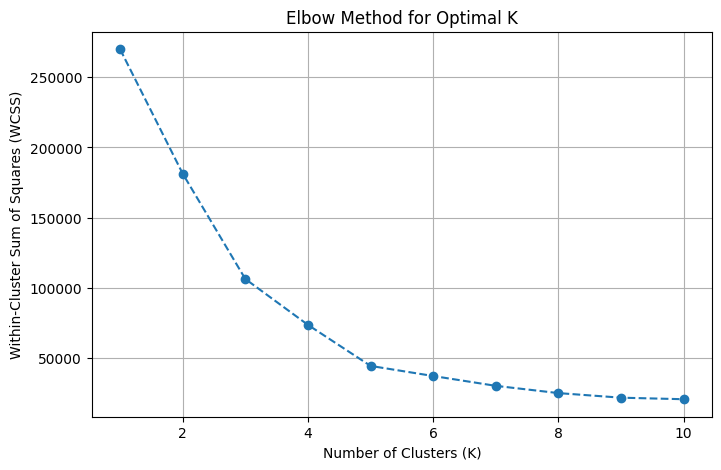

In [16]:
# Plot the Elbow Method graph to find the optimal K
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [17]:
# Based on the Elbow Method, let's choose K=5 as the optimal number of clusters

# Perform K-means clustering with K=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)  # Explicitly set n_init to suppress the warning
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [18]:
# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

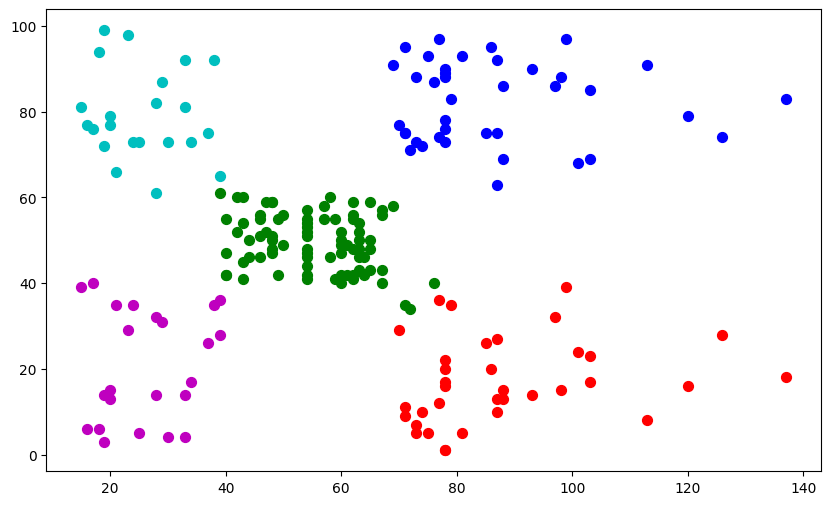

In [19]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                s=50, c=colors[i], label=f'Cluster {i}')

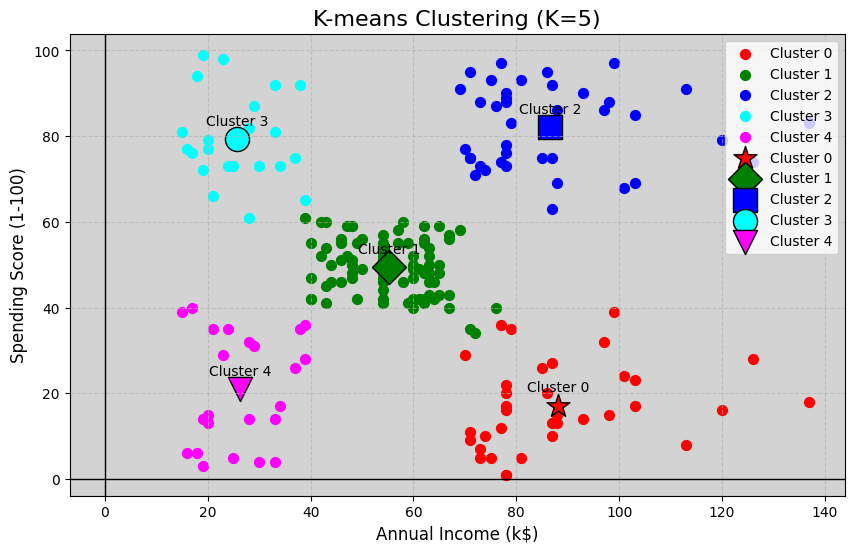

In [25]:
# Plot cluster centers with enhanced styling
plt.figure(figsize=(10, 6))

# Define colors and markers for cluster centers
colors = ['red', 'green', 'blue', 'cyan', 'magenta']
markers = ['*', 'D', 's', 'o', 'v']

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                s=50, c=colors[i], label=f'Cluster {i}')

# Annotate cluster centers with cluster numbers
for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], s=300, c=colors[i], marker=markers[i], label=f'Cluster {i}', edgecolors='black')
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize plot title, labels, and styling
plt.title(f'K-means Clustering (K={optimal_k})', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Add a background gradient
ax = plt.gca()
ax.set_facecolor('lightgray')

plt.show()